<a href="https://colab.research.google.com/github/RaphaelSerrano12/Projetos-IA-Big-Data/blob/main/Previs%C3%A3o_com_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
import pandas as pd

In [202]:
passageiros = pd.read_csv('Passageiros.csv')

In [203]:
passageiros.head()

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [204]:
import seaborn as sns

In [205]:
import matplotlib as mpl

mpl.rcParams[  'figure.figsize'] = (12.0,8.0)
mpl.rcParams['font.size'] = 22

<Axes: xlabel='tempo', ylabel='nPassageiros'>

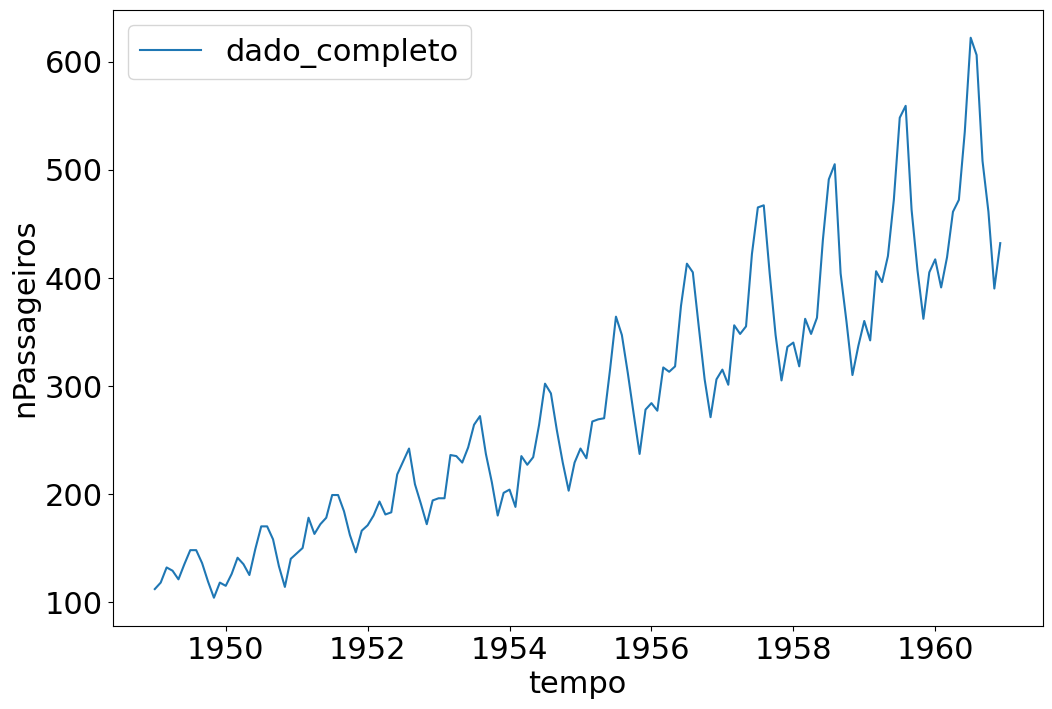

In [206]:
sns.lineplot(x='tempo' ,y='nPassageiros' ,data=passageiros ,label='dado_completo')

In [207]:
from sklearn.preprocessing import StandardScaler

In [208]:
sc = StandardScaler()

In [209]:
sc.fit(passageiros)

StandardScaler()

In [210]:
dado_escalado = sc.transform(passageiros)

In [211]:
x = dado_escalado[:,0]
y = dado_escalado[:,1]

In [212]:
import matplotlib.pyplot as plt

<Axes: >

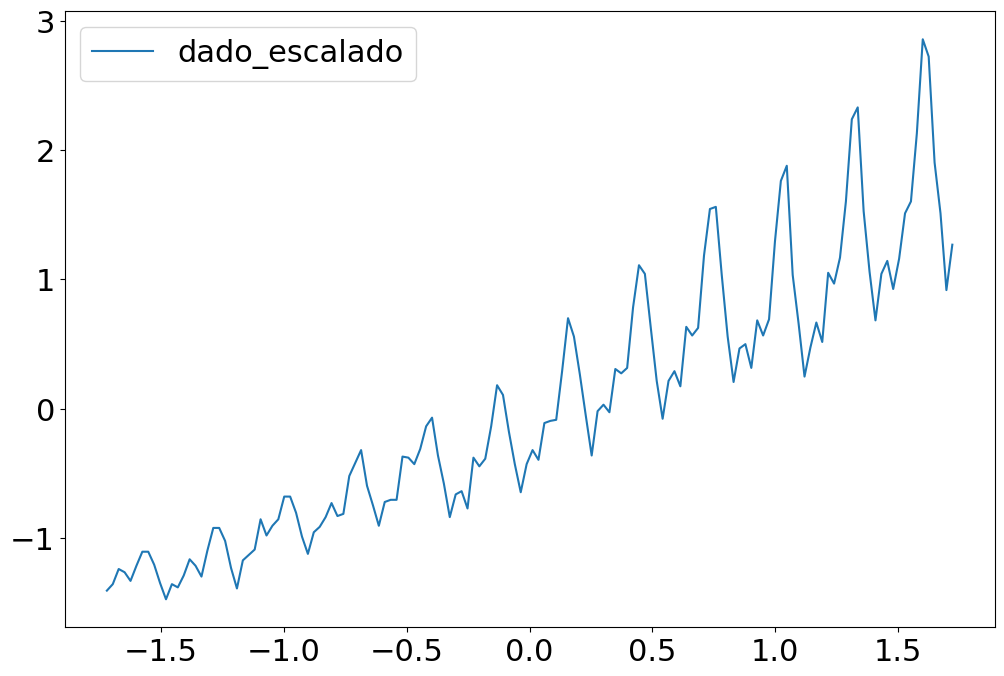

In [213]:
sns.lineplot(x=x,y=y,label='dado_escalado')

In [214]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros)-tamanho_treino

In [215]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [216]:
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

<Axes: >

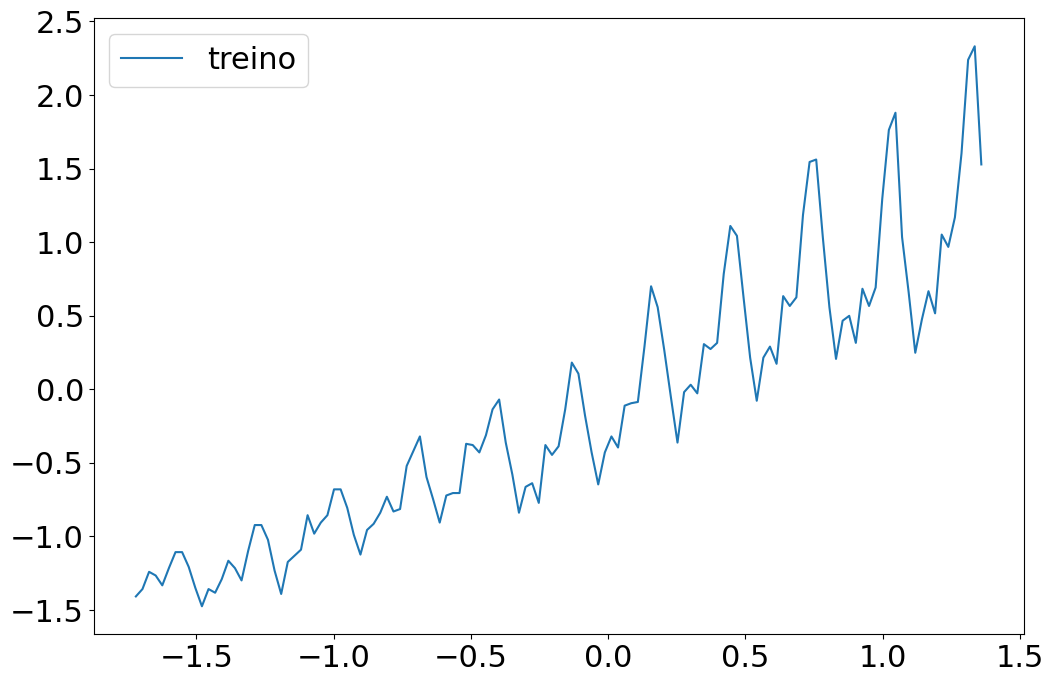

In [217]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')

<Axes: >

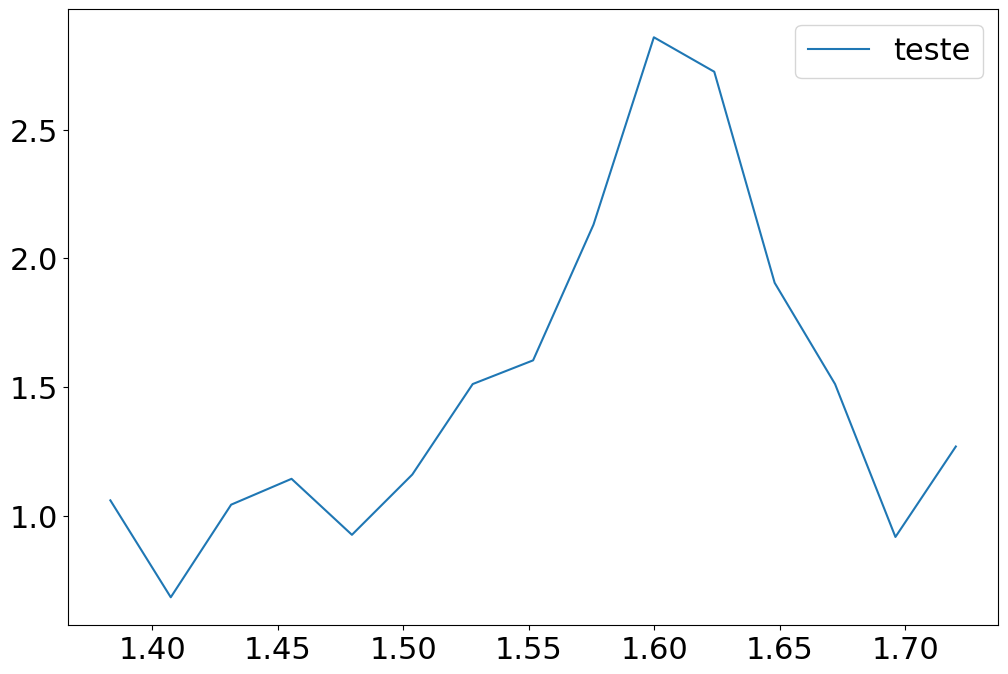

In [218]:
sns.lineplot(x=xteste,y=yteste,label='teste')

Text(0.5, 0, 'Data')

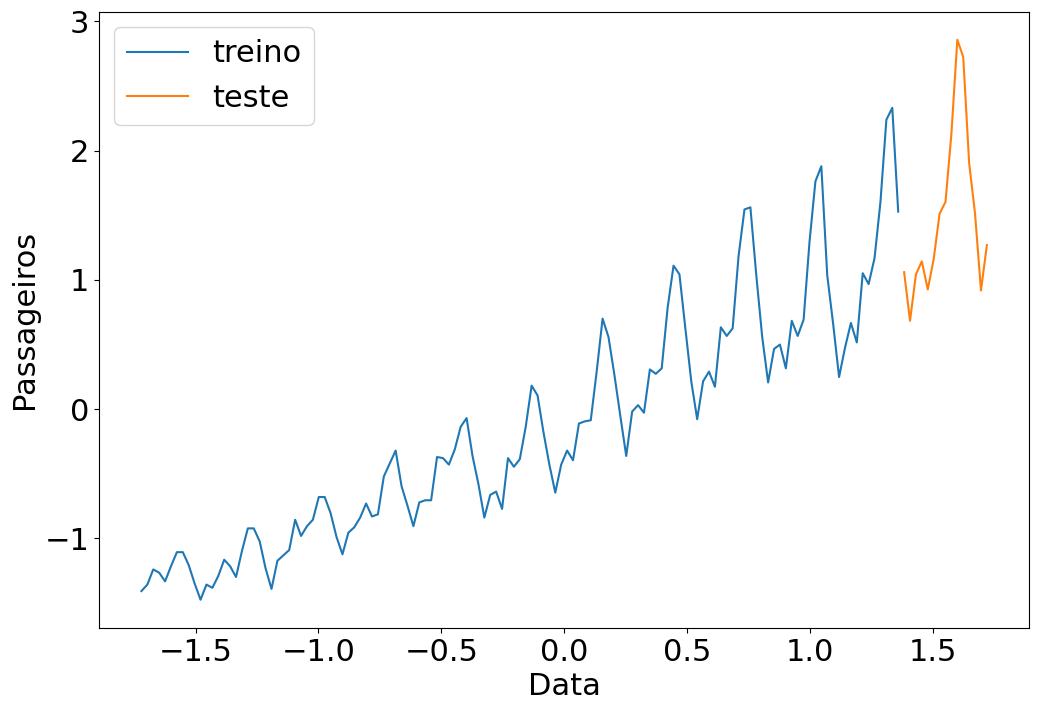

In [219]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [220]:
!pip install tensorFlow

In [221]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [222]:
regressor = Sequential()

In [223]:
regressor.add(Dense(1,input_dim=1,kernel_initializer='Ones',activation='linear',use_bias=False))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [224]:
regressor.compile(loss='mean_squared_error',optimizer='adam')

In [225]:
regressor.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                     │ (None, 1)                   │               1 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1 (4.00 B)

 Trainable params: 1 (4.00 B)

 Non-trainable params: 0 (0.00 B)

In [226]:
regressor.fit(xtreino,ytreino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1354 


In [227]:
y_predict = regressor.predict(xtreino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


<Axes: >

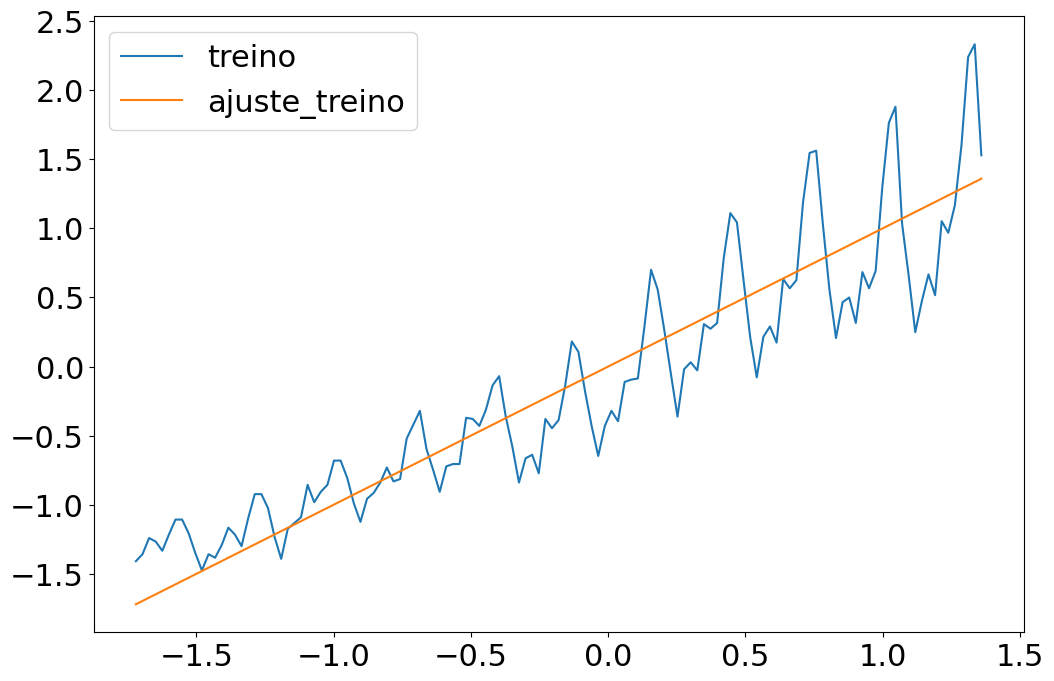

In [228]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')

In [229]:
d = {'tempo':xtreino,'passageiros':y_predict[:,0]}

resultado = pd.DataFrame(data=d)

In [230]:
resultados

,tempo,passageiros
0,-1.720064,-1.716330
1,-1.696007,-1.692325
2,-1.671950,-1.668321
3,-1.647894,-1.644316
4,-1.623837,-1.620311
...,...,...
124,1.262984,1.260242
125,1.287041,1.284247
126,1.311098,1.308252
127,1.335155,1.332256


In [231]:
resultado_transf = sc.inverse_transform(resultados)

In [232]:
resultado_transf = pd.DataFrame(resultado_transf)

In [233]:
resultado_transf.columns = ['tempo', 'nPassageiros']

<Axes: xlabel='tempo', ylabel='nPassageiros'>

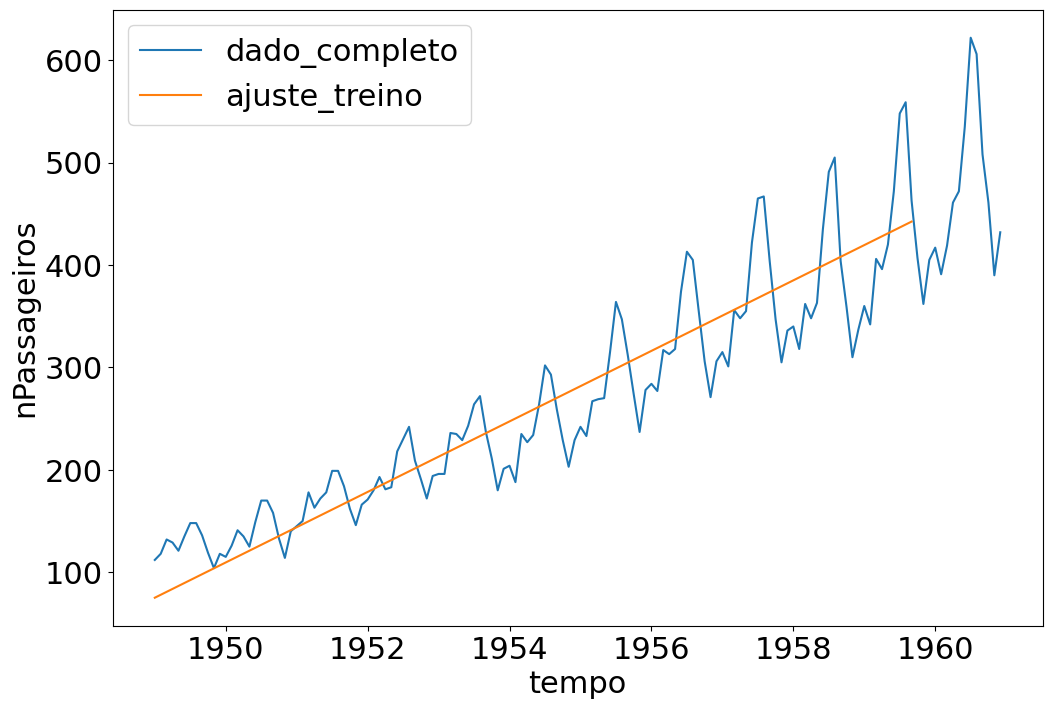

In [234]:
sns.lineplot(x='tempo', y='nPassageiros',data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='nPassageiros',data=resultado_transf, label='ajuste_treino')

In [235]:
y_predict_teste = regressor.predict(xteste)

d = {'tempo' :xteste, 'nPassageiros' : y_predict_teste[:,0]}

resultado_teste = pd.DataFrame(data=d)

resultado_transf_teste = sc.inverse_transform(resultado_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [236]:
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)
resultado_transf_teste.columns = ['tempo','nPassageiros']

<Axes: xlabel='tempo', ylabel='nPassageiros'>

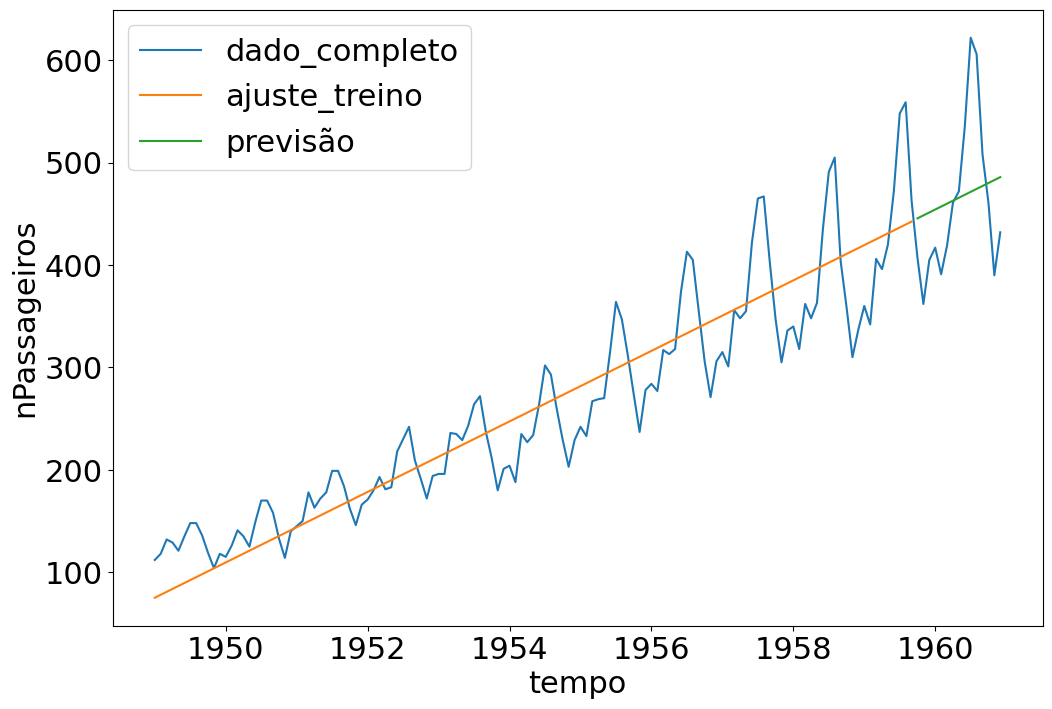

In [237]:
sns.lineplot(x='tempo', y='nPassageiros',data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='nPassageiros',data=resultado_transf, label='ajuste_treino')
sns.lineplot(x='tempo', y='nPassageiros',data=resultado_transf_teste, label='previsão')

In [238]:
regressor2 = Sequential()

In [239]:
regressor2.add(Dense(8,input_dim=1, kernel_initializer='random_uniform', activation='linear', use_bias=False))
regressor2.add(Dense(8, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [240]:
regressor2.compile(loss='mean_squared_error' , optimizer='adam')

In [241]:
regressor2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 8)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 8)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80 (320.00 B)

 Trainable params: 80 (320.00 B)

 Non-trainable params: 0 (0.00 B)

In [242]:
regressor2.fit(xtreino,ytreino, epochs=200)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.8872
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.7904 
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.7679 
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.8755
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8148
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8221
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8134
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8351
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8662
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.8073 
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.8295 
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7937
Epoch 13/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.7482
Epoch 14/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7589
Epoch 15/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7744 
Epoch 16/200
5

In [243]:
y_predict = regressor2.predict(xtreino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [244]:
y_predict_teste = regressor2.predict(xteste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


<Axes: >

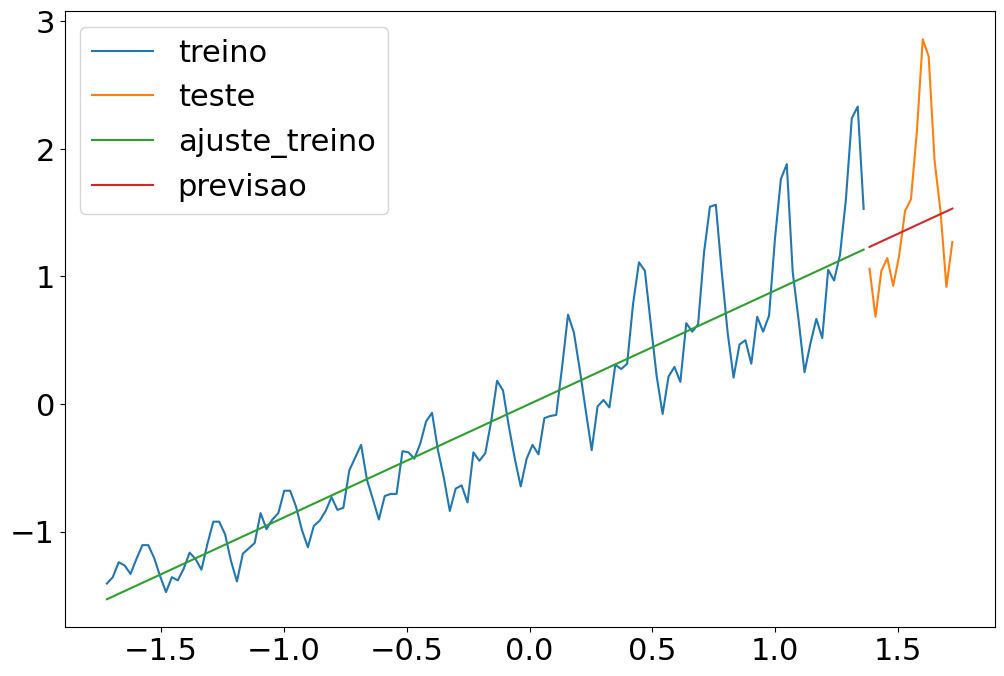

In [245]:
sns.lineplot(x=xtreino,y=ytreino, label='treino')
sns.lineplot(x=xteste,y=yteste, label='teste')
sns.lineplot(x=xtreino,y=y_predict[:,0], label='ajuste_treino')
sns.lineplot(x=xteste,y=y_predict_teste[:,0], label='previsao')

In [246]:
vetor = pd.DataFrame(ytreino)[0]

In [247]:
import numpy as np

In [248]:
def separa_dados(vetor,n_passos):
  x_novo, y_novo = [], []

  for i in range (n_passos, vetor.shape[0]):
    x_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  x_novo, y_novo = np.array(x_novo), np.array(y_novo)
  return x_novo, y_novo


In [249]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 1)

In [250]:
xtreino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [251]:
ytreino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [252]:
vetor2 = pd.DataFrame(yteste)[0]

In [253]:
xteste_novo,yteste_novo = separa_dados(vetor2,1)

In [254]:
regressor3 = Sequential()

In [255]:
regressor3.add(Dense(8,input_dim=1, kernel_initializer='ones',
                     activation='linear', use_bias=False))
regressor3.add(Dense(64,kernel_initializer='random_uniform',
                     activation='sigmoid',use_bias=False))
regressor3.add(Dense(1,kernel_initializer='random_uniform',
                    activation='linear',use_bias=False))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [256]:
regressor3.compile(loss='mean_squared_error',optimizer='adam')

In [257]:
regressor3.fit(xtreino_novo,ytreino_novo,epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.7950 
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6749 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6722 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6596 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7722 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6201
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6191 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5854 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6230
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5066 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4640 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5005 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4802 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3557 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3579
Epoch 16/100
4/4 ━

In [258]:
y_predict_novo = regressor3.predict(xtreino_novo)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


<Axes: xlabel='tempo', ylabel='0'>

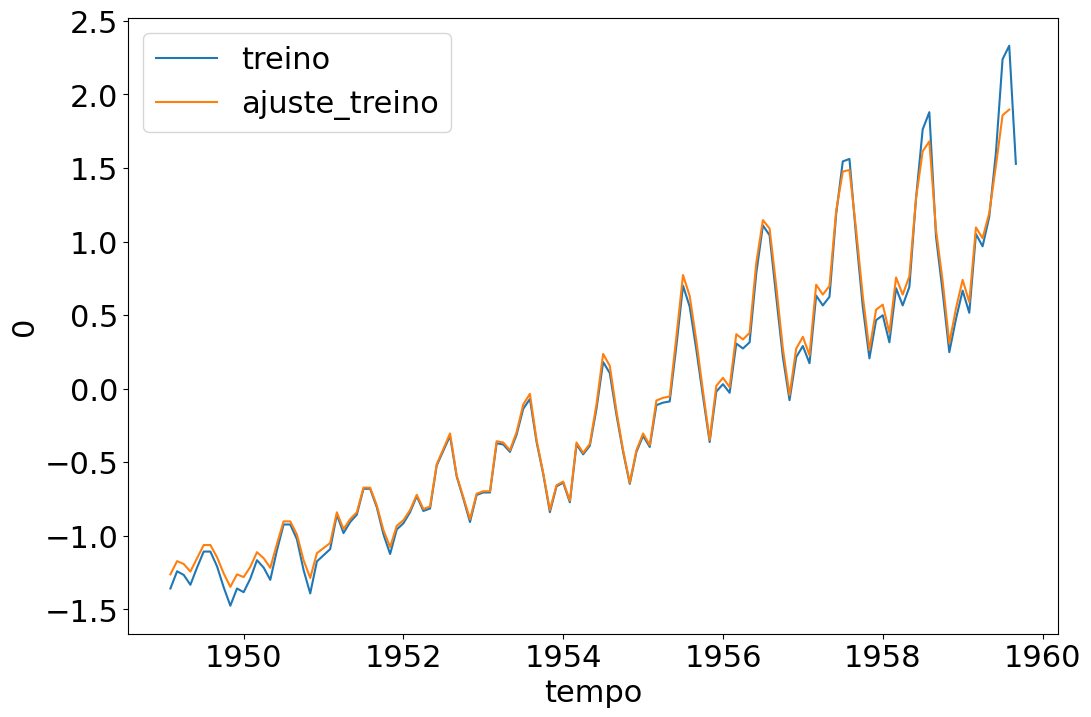

In [259]:
sns.lineplot(x='tempo', y=ytreino_novo,data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129],label='ajuste_treino')

In [260]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [261]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<Axes: xlabel='tempo', ylabel='0'>

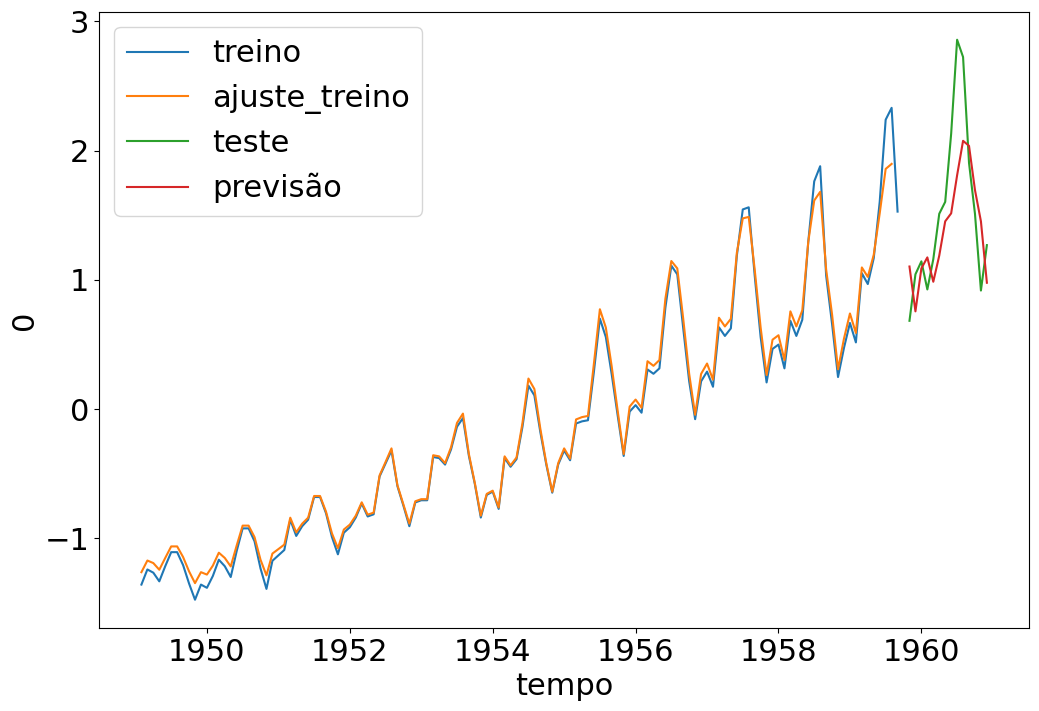

In [262]:
sns.lineplot(x='tempo', y=ytreino_novo,data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129],label='ajuste_treino')
sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[130:144], label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[130:144],label='previsão')

In [263]:
xtreino_novo,ytreino_novo = separa_dados(vetor,4)

In [264]:
xtreino_novo[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [265]:
ytreino_novo[0:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [266]:
xteste_novo,yteste_novo = separa_dados(vetor2,4)

In [267]:
regressor4=Sequential()

In [268]:
regressor4.add(Dense(8,input_dim=4, kernel_initializer='ones',
                     activation='linear', use_bias=False))
regressor4.add(Dense(64,kernel_initializer='random_uniform',
                     activation='sigmoid',use_bias=False))
regressor4.add(Dense(1,kernel_initializer='random_uniform',
                    activation='linear',use_bias=False))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [269]:
regressor4.compile(loss='mean_squared_error', optimizer='adam')

In [270]:
regressor4.fit(xtreino_novo,ytreino_novo,epochs=300)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.7477 
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6495
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6078
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4786
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4333
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4147 
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3600
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3089
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3128
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1910
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2209
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1515
Epoch 13/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1589
Epoch 14/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1563
Epoch 15/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1457
Epoch 16/300
4/4 

In [271]:
y_predict_novo = regressor4.predict(xtreino_novo)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [272]:
y_predict_teste_novo = regressor4.predict(xteste_novo)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


In [273]:
resultado_treino = pd.DataFrame(y_predict_novo) [0]

In [274]:
resultado = pd.DataFrame(y_predict_teste_novo) [0]

<Axes: xlabel='tempo'>

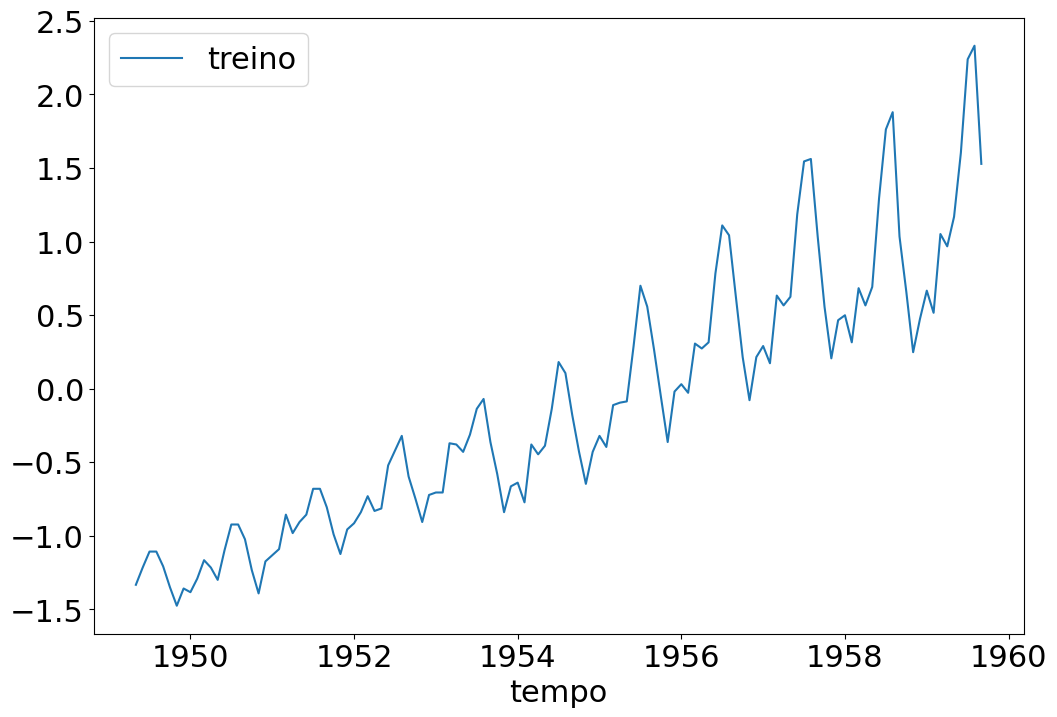

In [277]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[4:129], label='treino')

<Axes: xlabel='tempo'>

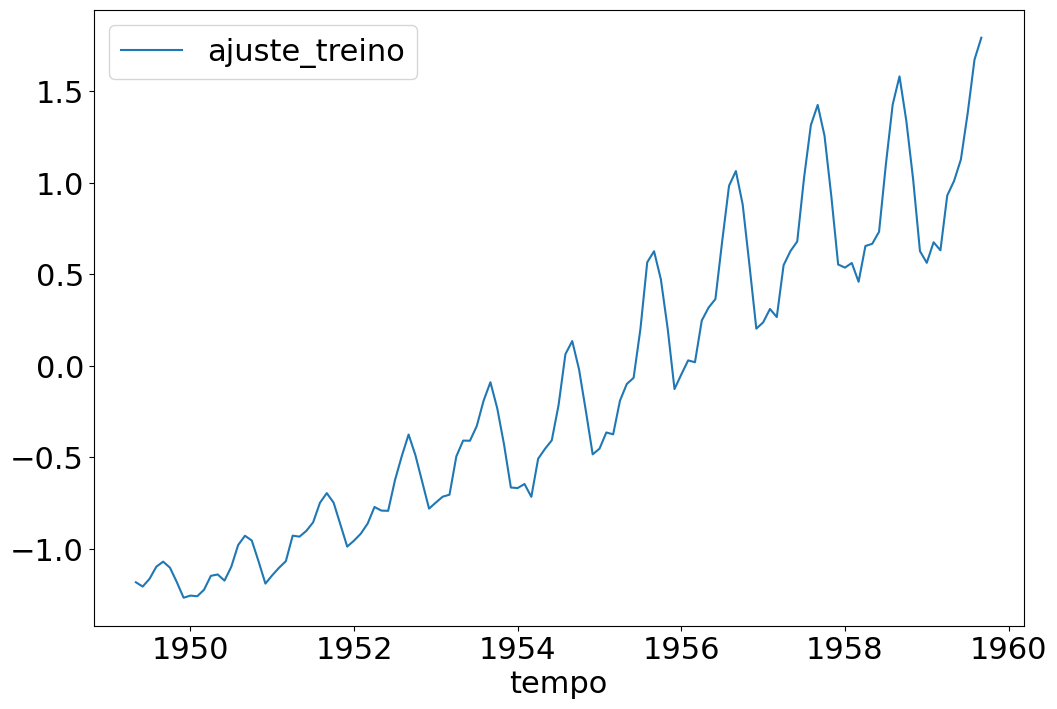

In [279]:
sns.lineplot(x='tempo',y=resultado_treino.values, data=passageiros[4:129],label='ajuste_treino')

<Axes: xlabel='tempo'>

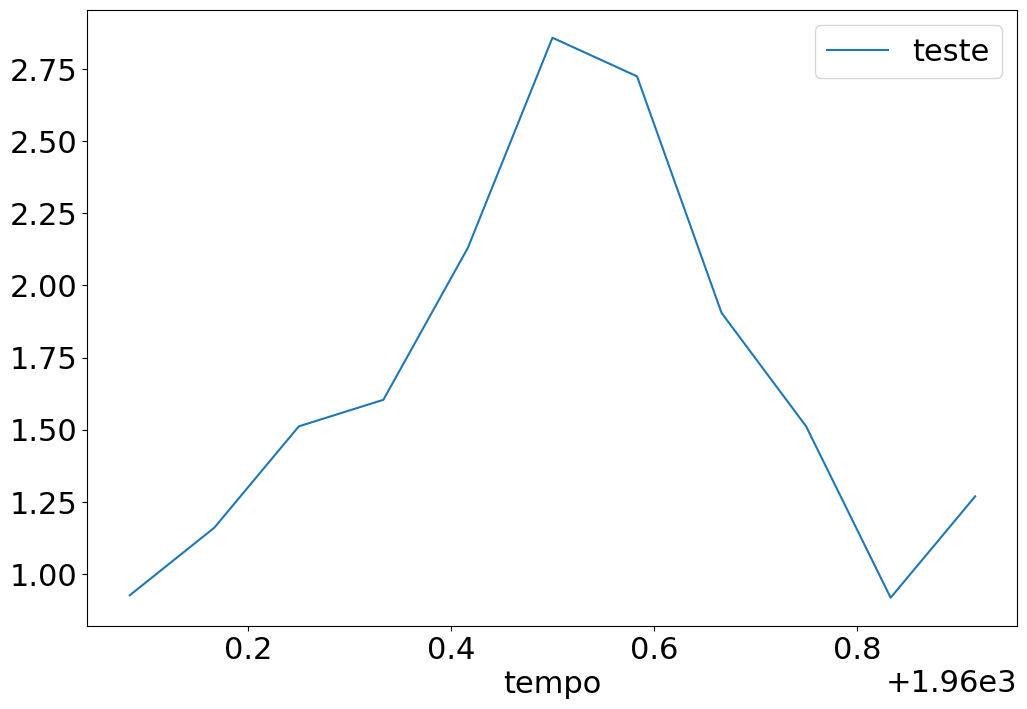

In [281]:
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[133:144], label='teste')

<Axes: xlabel='tempo'>

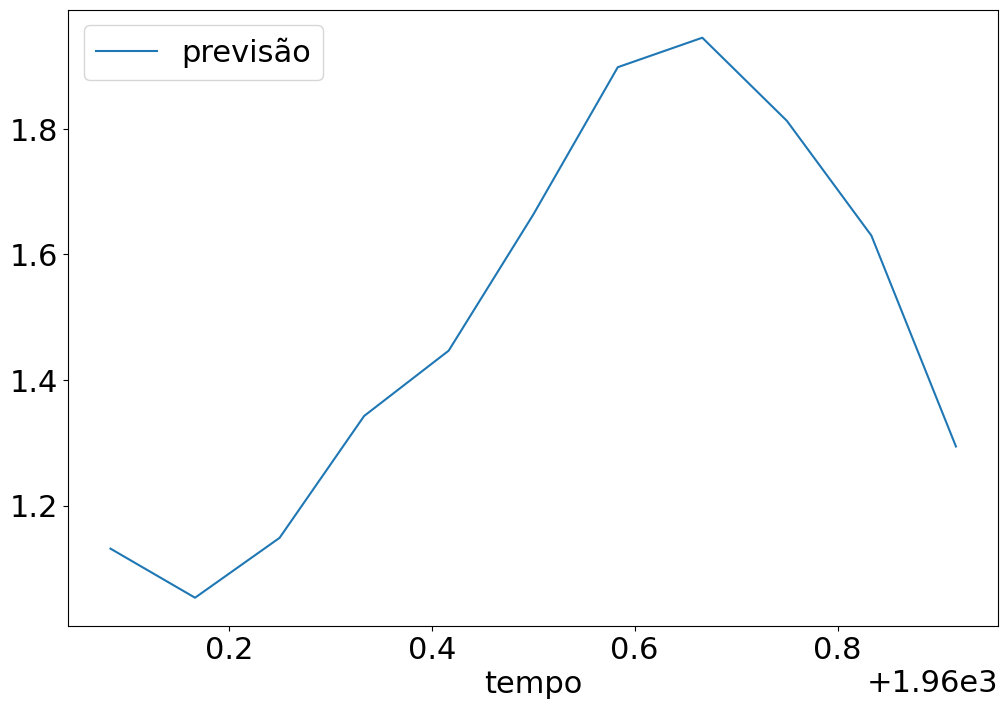

In [282]:
sns.lineplot(x='tempo', y=resultado.values,data=passageiros[133:144], label='previsão')